# Big Data Analytics: Exploratory Data Analytics of Housing Prices Problem



1) **Knowing the DataSet**

  1. Import Libraries
  2. Load data
  3. Variable Identification
  4. Run Statistical summaries


 
2) **Missing values imputation**

  1. Figure out missing value columns
  2. Fill out missing values


3) **Visualisations**

 1. Univariate Analysis
 2. Bivariate Analysis

**Import libraries**
====================

In [1]:
library(forecast)

**Load train & test data**
====================

In order to understand each and every column in the training dataset without any bias, we load the dataset as it is without associating strings as factors. We would eventually associate them to be factors after the data cleansing process. There are 1460 rows and 79 variables.

In [2]:
house.price.train<-read.csv("./input/train.csv", stringsAsFactors=FALSE)
head(house.price.train)

Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1,60,RL,65,8450,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,2,2008,WD,Normal,208500
2,20,RL,80,9600,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,5,2007,WD,Normal,181500
3,60,RL,68,11250,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,9,2008,WD,Normal,223500
4,70,RL,60,9550,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,2,2006,WD,Abnorml,140000
5,60,RL,84,14260,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,12,2008,WD,Normal,250000
6,50,RL,85,14115,Pave,NA,IR1,Lvl,AllPub,...,0,NA,MnPrv,Shed,700,10,2009,WD,Normal,143000


In [3]:
house.price.test = read.csv("./test/test.csv",stringsAsFactors=FALSE)

head(house.price.test)
#note their is no "SalePrice" column here which is our target varible.

Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1461,20,RH,80,11622,Pave,NA,Reg,Lvl,AllPub,...,120,0,NA,MnPrv,NA,0,6,2010,WD,Normal
1462,20,RL,81,14267,Pave,NA,IR1,Lvl,AllPub,...,0,0,NA,NA,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74,13830,Pave,NA,IR1,Lvl,AllPub,...,0,0,NA,MnPrv,NA,0,3,2010,WD,Normal
1464,60,RL,78,9978,Pave,NA,IR1,Lvl,AllPub,...,0,0,NA,NA,NA,0,6,2010,WD,Normal
1465,120,RL,43,5005,Pave,NA,IR1,HLS,AllPub,...,144,0,NA,NA,NA,0,1,2010,WD,Normal
1466,60,RL,75,10000,Pave,NA,IR1,Lvl,AllPub,...,0,0,NA,NA,NA,0,4,2010,WD,Normal


In [4]:
#shape command will give number of rows/samples/examples and number of columns/features/predictors in dataset
#(rows,columns)
dim(house.price.train)
#1460 Samples with 80 features and Sale Price

[1] 1460   81

There are total **1460 samples** which we can use to train model and **80 features** and **1 target variable.**

In [5]:
dim(house.price.test)
#1 column less because target variable isn't there in test set!
# One row less than the source!

[1] 1459   80

Variable Identification
-----------------------

As expected, the column datatype is either associated as integers or characters. However, we can notice that there are NA's that needs futher investigation, without which the modelling exercise would fail. 

In [6]:
#info method provides information about dataset like 
#total values in each column, null/not null, datatype, memory occupied etc
summary(house.price.train)
str(house.price.train)

       Id           MSSubClass      MSZoning          LotFrontage    
 Min.   :   1.0   Min.   : 20.0   Length:1460        Min.   : 21.00  
 1st Qu.: 365.8   1st Qu.: 20.0   Class :character   1st Qu.: 59.00  
 Median : 730.5   Median : 50.0   Mode  :character   Median : 69.00  
 Mean   : 730.5   Mean   : 56.9                      Mean   : 70.05  
 3rd Qu.:1095.2   3rd Qu.: 70.0                      3rd Qu.: 80.00  
 Max.   :1460.0   Max.   :190.0                      Max.   :313.00  
                                                     NA's   :259     
    LotArea          Street             Alley             LotShape        
 Min.   :  1300   Length:1460        Length:1460        Length:1460       
 1st Qu.:  7554   Class :character   Class :character   Class :character  
 Median :  9478   Mode  :character   Mode  :character   Mode  :character  
 Mean   : 10517                                                           
 3rd Qu.: 11602                                                  

'data.frame':	1460 obs. of  81 variables:
 $ Id           : int  1 2 3 4 5 6 7 8 9 10 ...
 $ MSSubClass   : int  60 20 60 70 60 50 20 60 50 190 ...
 $ MSZoning     : chr  "RL" "RL" "RL" "RL" ...
 $ LotFrontage  : int  65 80 68 60 84 85 75 NA 51 50 ...
 $ LotArea      : int  8450 9600 11250 9550 14260 14115 10084 10382 6120 7420 ...
 $ Street       : chr  "Pave" "Pave" "Pave" "Pave" ...
 $ Alley        : chr  NA NA NA NA ...
 $ LotShape     : chr  "Reg" "Reg" "IR1" "IR1" ...
 $ LandContour  : chr  "Lvl" "Lvl" "Lvl" "Lvl" ...
 $ Utilities    : chr  "AllPub" "AllPub" "AllPub" "AllPub" ...
 $ LotConfig    : chr  "Inside" "FR2" "Inside" "Corner" ...
 $ LandSlope    : chr  "Gtl" "Gtl" "Gtl" "Gtl" ...
 $ Neighborhood : chr  "CollgCr" "Veenker" "CollgCr" "Crawfor" ...
 $ Condition1   : chr  "Norm" "Feedr" "Norm" "Norm" ...
 $ Condition2   : chr  "Norm" "Norm" "Norm" "Norm" ...
 $ BldgType     : chr  "1Fam" "1Fam" "1Fam" "1Fam" ...
 $ HouseStyle   : chr  "2Story" "1Story" "2Story" "2Story" ...


**Missing Values**
====================

The missing values belonging to a particular column in the dataset seems to have a pattern. They can be clustered as follows:

1. Parameters belonging to Basement (BsmtExposure, BsmtFinType2, BsmtQual, BsmtCond, BsmtFinType1) 
2. Parameters belonging to Garage (GarageType, GarageYrBlt, GarageFinish, GarageQual, GarageCond)
3. Masonary Veneer Finishing of the house ( MasVnrType, MasVnrArea)
4. Miscelleneous Features of the House (MiscFeature, Alley, Fence. FireplaceQu, PoolQC, Electrical)
5. Lot Frontage

In all there are 19 missing value columns that needs imputation.

In [7]:
sort(colSums(is.na(house.price.train)),T)

PoolQC   MiscFeature         Alley         Fence   FireplaceQu 
         1453          1406          1369          1179           690 
  LotFrontage    GarageType   GarageYrBlt  GarageFinish    GarageQual 
          259            81            81            81            81 
   GarageCond  BsmtExposure  BsmtFinType2      BsmtQual      BsmtCond 
           81            38            38            37            37 
 BsmtFinType1    MasVnrType    MasVnrArea    Electrical            Id 
           37             8             8             1             0 
   MSSubClass      MSZoning       LotArea        Street      LotShape 
            0             0             0             0             0 
  LandContour     Utilities     LotConfig     LandSlope  Neighborhood 
            0             0             0             0             0 
   Condition1    Condition2      BldgType    HouseStyle   OverallQual 
            0             0             0             0             0 
  OverallCond     YearBuilt  YearRemodAdd     RoofStyle      RoofMatl 
            0             0             0             0             0 
  Exterior1st   Exterior2nd     ExterQual     ExterCond    Foundation 
            0             0             0             0             0 
   BsmtFinSF1    BsmtFinSF2     BsmtUnfSF   TotalBsmtSF       Heating 
            0             0             0             0             0 
    HeatingQC    CentralAir     X1stFlrSF     X2ndFlrSF  LowQualFinSF 
            0             0             0             0             0 
    GrLivArea  BsmtFullBath  BsmtHalfBath      FullBath      HalfBath 
            0             0             0             0             0 
 BedroomAbvGr  KitchenAbvGr   KitchenQual  TotRmsAbvGrd    Functional 
            0             0             0             0             0 
   Fireplaces    GarageCars    GarageArea    PavedDrive    WoodDeckSF 
            0             0             0             0             0 
  OpenPorchSF EnclosedPorch    X3SsnPorch   ScreenPorch      PoolArea 
            0             0             0             0             0 
      MiscVal        MoSold        YrSold      SaleType SaleCondition 
            0             0             0             0             0 
    SalePrice 
            0

We create a function that would be useful for replacing NAs with a common value. This would be helpful for static imputation.

In [11]:
impute_NA<-function(df,column, value){
    
    df[is.na(df[column]),column]<-value
    df[is.na(df[column]),c('Id',column)]
    return(df)
}

### Handling Missing Values : Basement related features

We can see that the missing values belong to the same group. There is a high chance that these values correspond to the houses that do not have any basements at all. So, it is better to treat these missing values as 'None'.

In [12]:
house.price.train[is.na(house.price.train['BsmtCond']),c('Id','BsmtCond','BsmtQual','BsmtFinType1','BsmtFinType2','BsmtExposure')]

,Id,BsmtCond,BsmtQual,BsmtFinType1,BsmtFinType2,BsmtFinType2.1
18,18,NA,NA,NA,NA,NA
40,40,NA,NA,NA,NA,NA
91,91,NA,NA,NA,NA,NA
103,103,NA,NA,NA,NA,NA
157,157,NA,NA,NA,NA,NA
183,183,NA,NA,NA,NA,NA
260,260,NA,NA,NA,NA,NA
343,343,NA,NA,NA,NA,NA
363,363,NA,NA,NA,NA,NA
372,372,NA,NA,NA,NA,NA


In [33]:
house.price.train<-impute_NA(df = house.price.train,column = 'BsmtCond',value = 'None')
house.price.train<-impute_NA(df = house.price.train,column = 'BsmtQual',value = 'None')
house.price.train<-impute_NA(df = house.price.train,column = 'BsmtFinType1',value = 'None')
house.price.train<-impute_NA(df = house.price.train,column = 'BsmtFinType2',value = 'None')
house.price.train<-impute_NA(df = house.price.train,column = 'BsmtExposure',value = 'None')
#house.price.train[is.na(house.price.train['BsmtQual']),'BsmtQual']<-'None'
#levels(get('BsmtQual',house.price.train))
#c(levels(house.price.train[,'BsmtQual']),'None')

### Handling Missing Values : Garage related features

We employ a similar approach to handle the missing values related to garage features.These missing values belongs to a peculiar case where the NA's actually mean that there are no garages. For these records, 'GarageCars' is 0, that ultimately substantiates our earlier hypothesis.

In [15]:
house.price.train[is.na(house.price.train['GarageType']),c('GarageCars','GarageType','GarageYrBlt','GarageFinish','GarageQual','GarageCond')]

,GarageCars,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond
40,0,NA,NA,NA,NA,NA
49,0,NA,NA,NA,NA,NA
79,0,NA,NA,NA,NA,NA
89,0,NA,NA,NA,NA,NA
90,0,NA,NA,NA,NA,NA
100,0,NA,NA,NA,NA,NA
109,0,NA,NA,NA,NA,NA
126,0,NA,NA,NA,NA,NA
128,0,NA,NA,NA,NA,NA
141,0,NA,NA,NA,NA,NA


In [17]:
house.price.train<-impute_NA(df = house.price.train,column = 'GarageType',value = 'None')
house.price.train<-impute_NA(df = house.price.train,column = 'GarageYrBlt',value = 'None')
house.price.train<-impute_NA(df = house.price.train,column = 'GarageFinish',value = 'None')
house.price.train<-impute_NA(df = house.price.train,column = 'GarageQual',value = 'None')
house.price.train<-impute_NA(df = house.price.train,column = 'GarageCond',value = 'None')

## Handling Missing Values : Miscellaneous  Features

#### MasVnrType and MasVnrArea

These belong to a class of records that have unknown values for MasVnrType and MasVnrArea. The most common type of MasVnrType is  None and MasVnrArea is 0. We use the most commonly seen feature for these features.

In [22]:
house.price.train<-impute_NA(df = house.price.train,column = 'MasVnrType',value = 'None')
house.price.train<-impute_NA(df = house.price.train,column = 'MasVnrArea',value = 0)

#### PoolQC, MiscFeature, FireplaceQu

The pool area is 0 for records that have PoolQC as NA. We can associate them with 'None'. Similarly, we can associate MiscFeature and  FireplaceQu with 'None' for such records.

In [19]:
house.price.train<-impute_NA(df = house.price.train,column = 'PoolQC',value = 'None')

In [20]:
house.price.train<-impute_NA(df = house.price.train,column = 'MiscFeature',value = 'None')

In [23]:
house.price.train<-impute_NA(df = house.price.train,column = 'Alley',value = 'None')

In [24]:
house.price.train<-impute_NA(df = house.price.train,column = 'Fence',value = 'None')

In [25]:
house.price.train<-impute_NA(df = house.price.train,column = 'FireplaceQu',value = 'None')

In [26]:
library("dplyr")
house.price.train %>% group_by(Electrical) %>% summarize(count=n())


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



Electrical,count
FuseA,94
FuseF,27
FuseP,3
Mix,1
SBrkr,1334
NA,1


In [27]:
house.price.train<-impute_NA(df = house.price.train,column = 'Electrical',value = 'SBrkr')

[1] 1.914894

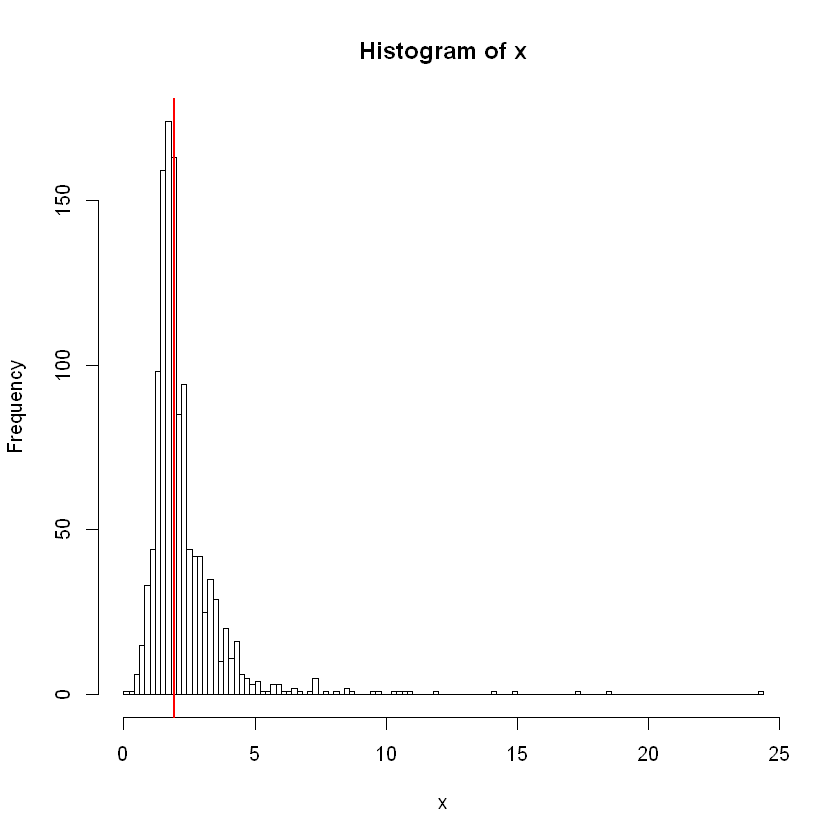

In [28]:
#house.price.train[is.na(house.price.train['BsmtQual']),'BsmtQual']<-'None'
#house.price.train[is.na(house.price.train['BsmtQual']),'BsmtQual']
#sort(colSums(is.na(house.price.train)),T)
#mode(house.price.train['FireplaceQu'])
#match(house.price.train['FireplaceQu'], unique(house.price.train['FireplaceQu']))
#mode(df=house.price.train,col=FireplaceQu)
#sqldf("SELECT 1 FROM df")
mymean <- function(cleaned_us){
   column_total = sum(cleaned_us, na.rm = TRUE) #change
   column_length = sum(!is.na(cleaned_us)) #change
  return(column_total/column_length)
 }
x <- na.omit(house.price.train$LotArea/(house.price.train$LotFrontage*house.price.train$LotFrontage))
h<-hist(x,breaks=100)
abline(v = median(x),
 col = "red",
 lwd = 2)
median(x)

In [31]:
 house.price.train[is.na(house.price.train['LotFrontage']),'LotFrontage']<-sqrt(house.price.train[is.na(house.price.train['LotFrontage']),'LotArea']/2)
 #house.price.train['LotFrontage']

In [32]:
sort(colSums(is.na(house.price.train)),T)

BsmtExposure            Id    MSSubClass      MSZoning   LotFrontage 
           38             0             0             0             0 
      LotArea        Street         Alley      LotShape   LandContour 
            0             0             0             0             0 
    Utilities     LotConfig     LandSlope  Neighborhood    Condition1 
            0             0             0             0             0 
   Condition2      BldgType    HouseStyle   OverallQual   OverallCond 
            0             0             0             0             0 
    YearBuilt  YearRemodAdd     RoofStyle      RoofMatl   Exterior1st 
            0             0             0             0             0 
  Exterior2nd    MasVnrType    MasVnrArea     ExterQual     ExterCond 
            0             0             0             0             0 
   Foundation      BsmtQual      BsmtCond  BsmtFinType1    BsmtFinSF1 
            0             0             0             0             0 
 BsmtFinType2    BsmtFinSF2     BsmtUnfSF   TotalBsmtSF       Heating 
            0             0             0             0             0 
    HeatingQC    CentralAir    Electrical     X1stFlrSF     X2ndFlrSF 
            0             0             0             0             0 
 LowQualFinSF     GrLivArea  BsmtFullBath  BsmtHalfBath      FullBath 
            0             0             0             0             0 
     HalfBath  BedroomAbvGr  KitchenAbvGr   KitchenQual  TotRmsAbvGrd 
            0             0             0             0             0 
   Functional    Fireplaces   FireplaceQu    GarageType   GarageYrBlt 
            0             0             0             0             0 
 GarageFinish    GarageCars    GarageArea    GarageQual    GarageCond 
            0             0             0             0             0 
   PavedDrive    WoodDeckSF   OpenPorchSF EnclosedPorch    X3SsnPorch 
            0             0             0             0             0 
  ScreenPorch      PoolArea        PoolQC         Fence   MiscFeature 
            0             0             0             0             0 
      MiscVal        MoSold        YrSold      SaleType SaleCondition 
            0             0             0             0             0 
    SalePrice 
            0